# Section A. Conduct simple data exploration and data analysis on the given dataset 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('student-mat.csv')

# 1) Display your dataset, show the full column names to view all attributes 

pd.set_option('display.max_column',500)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
# 2) Display the number of attributes available in the dataset

display(df.shape)
print('The number of attributes: ',len(df.columns))


(395, 33)

The number of attributes:  33


In [4]:
# 3) Find the dimension number of your dataset 

display(df.ndim)
print('The number of dimension: ',df.ndim)

2

The number of dimension:  2


In [5]:
# 4) Find the average values (rounding to 2 decimal points) of these attributes: "Dalc”, "Walc” and "days of absences"

avg_Dalc = round(df['Dalc'].mean(),2)
avg_Walc = round(df['Walc'].mean(),2)
avg_absences = round(df['absences'].mean(),2)

print('Average of Dalc: ', avg_Dalc)
print('Average of Walc: ', avg_Walc)
print('Average of days of absences: ', avg_absences)

Average of Dalc:  1.48
Average of Walc:  2.29
Average of days of absences:  5.71


In [6]:
# 5) Find the minimum and maximum of the attribute, "days of absences"

min_absences = min(df['absences'])
max_absences = max(df['absences'])

print('Minimum number of days of absences:', min_absences)
print('Maximum number of days of absences:', max_absences)

Minimum number of days of absences: 0
Maximum number of days of absences: 75


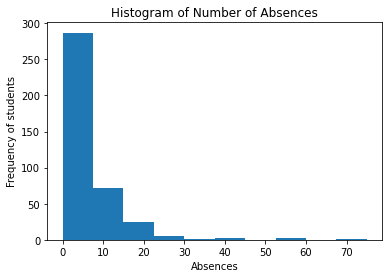

In [7]:
# 6) Provide graphical visualization by plotting histogram of ‘Number of Absences’ to observe the
# absence trends amongst students

plt.hist(df['absences'])
plt.title('Histogram of Number of Absences')
plt.xlabel("Absences")
plt.ylabel("Frequency of students")
plt.show()


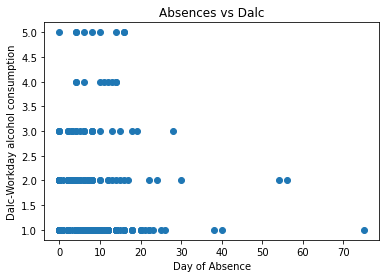

In [8]:
# 7) Use scatter plot to visualize the distributions between “absences” and "Dalc”

plt.scatter(df['absences'],df['Dalc'])
plt.title('Absences vs Dalc')
plt.xlabel("Day of Absence")
plt.ylabel("Dalc-Workday alcohol consumption")
plt.show()


[[1.         0.11190803]
 [0.11190803 1.        ]]


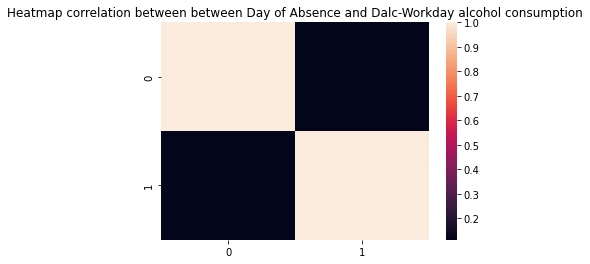

In [9]:
#  8) Find the correlation between “absences” and "Dalc” and plot the heatmap of these two attributes

corr = np.corrcoef(df['absences'],df['Dalc'])
print(corr)

import seaborn as sns
sns.heatmap(corr)
plt.title('Heatmap correlation between between Day of Absence and Dalc-Workday alcohol consumption')
plt.show()


In [10]:
## 9) Discussion 

# Range of days for absences from 0 to 75
absences_range = max_absences - min_absences
print('Range of days for absences:', absences_range)

Range of days for absences: 75


In [11]:
# Most and Least Frequent days for absences for students 
from statistics import mode

frequent_day = mode(df['absences'])
print('Most Frequent days for absences for students:', frequent_day)
print('Most and Least Frequent days for absences for students as below:')
df['absences'].value_counts()

Most Frequent days for absences for students: 0
Most and Least Frequent days for absences for students as below:


0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

3) Discuss your observation on the distribution of days for absences

Based the histogram graph, it shows that the data are not normally distributed, and skewed to the right. This distribution has a single peak

 4) Is there a linear relationship between days for absences and Dalc?

The correlation coefficient between "absences" and "Dalc" is 0.11190803, this shows a very low value meaning that it is a very weak and can consider to be no linear relationship at all. The correlation is very small; almost negligible relationship. There is no apperent relationship between day of absences and Workday alcohol consumption.

# Section B. Classification Using Naïve Bayes for: “Age”, “Nursery”, “Dalc”, “Walc” to predict whether student wants to go to higher education found in the attribute: “higher”

In [12]:
# 1) Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 2) Import dataset

dataset = pd.read_csv('student-mat.csv')
# display the full column to view all attributes
pd.set_option('display.max_columns', 500)
dataset.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [14]:
# 3) Allocate the relevant attributes as input and output
x = dataset.iloc[:,[2,19,26,27]].values # age, nursery, Dalc, Walc
y = dataset.iloc[:,20].values # higher

In [15]:
# 4) Use LabelEncoder to encode categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder_x = LabelEncoder()
x[:, 1] = labelencoder_x.fit_transform (x[:,1]) # for nursery 
print(x)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) # for higher (yes/no)
print(y)


[[18 1 1 1]
 [17 0 1 1]
 [15 1 2 3]
 ...
 [21 0 3 3]
 [18 0 3 4]
 [19 1 3 3]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
# 5) Split your data into training and test sets with the appropriate proportions (70/30)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)


In [17]:
# 6) Normalized your data using StandardScaler

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [18]:
# 7) Fit the and predict results using the Naïve Bayes Classifier

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_test)
print(y_pred)

[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [19]:
# 8) Evaluate your results using confusion matrix and calculate the prediction accuracy
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,y_pred)
print(cm)

accuracy = accuracy_score(y_test,y_pred)
print('The model accuracy is :', accuracy)


[[  0   7]
 [  0 112]]
The model accuracy is : 0.9411764705882353


In [20]:
# 9) Discuss your results and findings


The accuracy of the Naive Bayes classifier is high, 94%.
Based on the result, “Age”, “Nursery”, “Dalc”, “Walc” is a good predictor to predict the student that would proceed for higher education. 
However, despite higher accuracy result, it can be seen that the test dataset is a bit bias which majority of the value are 1 (yes)
The F-score is not reliable since the precision and recall was bias towards predicted values of yes (1)

# Section C. Use Multiple Linear Regression to Predict final grade (G3) based on first (G1) and second (G2) grade

In [21]:
# 1) Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
# 2) Import dataset

ds = pd.read_csv('student-mat.csv')
# display the full column to view all attributes
pd.set_option('display.max_columns', 500)
ds.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [23]:
# 3) Allocate the relevant attributes as input and output


X = ds.iloc[:,[-3, -2]].values # for G1, G2
Y = ds.iloc[:,-1].values # for G3


In [24]:
# 4) Split your data into training and test sets with the appropriate proportions (70/30)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)


In [25]:
# 5) Fit the and predict results using the Multiple Linear Regression 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_predict = regressor.predict(X_test)
print(Y_predict)
print(Y_test)


[ 5.95510551  9.56250912  6.94678259  8.41273895  9.72060221 10.87037238
  7.42106187 12.17823565 11.70395637  7.42106187 12.17823565 14.3196829
  5.95510551  7.78036658  8.25464586 11.02846548 15.31135997 16.14494396
  6.11319861  9.56250912 10.87037238 18.76067049  9.24632293 11.54586328
 15.46945307  3.97175136 11.02846548  7.57915496  8.93013675 13.32800582
 12.17823565 11.86204946  7.26296878 10.71227929 13.01181963  8.09655276
 10.71227929  9.08822984  7.57915496 10.71227929  9.40441603 10.5541862
 16.46113014  7.10487569  9.8786953  12.17823565 18.76067049  9.24632293
 13.01181963  8.25464586  3.97175136 11.70395637 11.02846548  5.12152153
  6.42938479  9.72060221  6.11319861 15.46945307  9.24632293  3.97175136
  6.2712917   8.57083204 12.17823565 16.46113014 14.00349671  8.25464586
 10.71227929 15.31135997  8.41273895  9.72060221 14.99517379 11.54586328
 11.54586328 13.16991272 11.86204946  9.56250912 10.71227929 13.16991272
 11.86204946 13.01181963  8.57083204  9.56250912 14.9

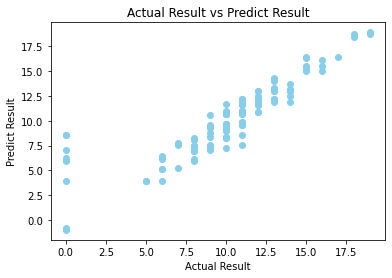

In [26]:
# 6) Using graphical visualizations to compare your predicted results vs the actual results in a scatter plot

plt.scatter(Y_test, Y_predict, color ='skyblue')
plt.title('Actual Result vs Predict Result')
plt.xlabel("Actual Result")
plt.ylabel("Predict Result")
plt.show()


In [27]:
# 7) Discuss results and findings

In [28]:
corr = np.corrcoef(Y_test, Y_predict)
print(corr)

[[1.         0.88575223]
 [0.88575223 1.        ]]


In [29]:
# calculate the MSE 
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(Y_test, Y_predict)
print(MSE)

3.461453578590131


- The model showing a good accuracy of 89.46%
- Based the scatter plot graph, we can see that actual and predict result have positive correlation.
- The MSE is 6.07 which is acceptable 
- Theres a bunch of 0 value which indicates might be some parts of the data are having some 
- To summarize, Multiple Linear Regression can be use to Predict final grade(G3) based on first(G1) and second(G2) grade with good accuracy